https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br

In [1]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# bibliotecas auxiliares
import numpy as np
import matplotlib.pyplot as plt

# verificando a versao do tensorflow
print(tf.__version__)

2.2.0


In [2]:
# caregamento das imagens do MNIST de roupas
fashion_mnist = keras.datasets.fashion_mnist

# Duas tuplas de dados de treinamento e de teste
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


As imagens são arrays NumPy de 28x28, com os valores des pixels entre 0 to 255. As labels (alvo da classificação) são um array de inteiros, no intervalo de 0 a 9. Esse corresponde com a classe de roupa que cada imagem representa:
* Label Classe
* 0 	Camisetas/Top (T-shirt/top)
* 1 	Calça (Trouser)
* 2 	Suéter (Pullover)
* 3 	Vestidos (Dress)
* 4 	Casaco (Coat)
* 5 	Sandálias (Sandal)
* 6 	Camisas (Shirt)
* 7 	Tênis (Sneaker)
* 8 	Bolsa (Bag)
* 9 	Botas (Ankle boot)

Cada imagem é mapeada com um só label. Já que o nome das classes não são incluídas na base de dados, armazene os dados aqui para usá-los mais tarde quando plotarmos as imagens:

In [3]:
# Guardando os nomes dos labels
class_names = ['Camisetas/Top', 'Calça', 'Suéter', 'Vestidos', 'Casaco',
               'Sandálias', 'Camisas', 'Tênis', 'Bolsa', 'Botas']

In [4]:
# conjunto de treinamento
print(f'shape do conjunto de treinamento: {train_images.shape}')
print(f'length dos LABELS do conj. treinamento: {len(train_labels)}')

shape do conjunto de treinamento: (60000, 28, 28)
length dos LABELS do conj. treinamento: 60000


In [5]:
# conjunto de teste
print(f'shape do conjunto de teste: {test_images.shape}')
print(f'length dos LABELS do conj. teste: {len(test_labels)}')

shape do conjunto de teste: (10000, 28, 28)
length dos LABELS do conj. teste: 10000


In [6]:
# escalando o conjunto de caracteristica de treinamento e teste para que fique entre 0 e 1 (a escala estava entre 0 e 255 que afeta e muito o treinamento por redes neurais)
train_images = train_images / 255.0
test_images = test_images / 255.0

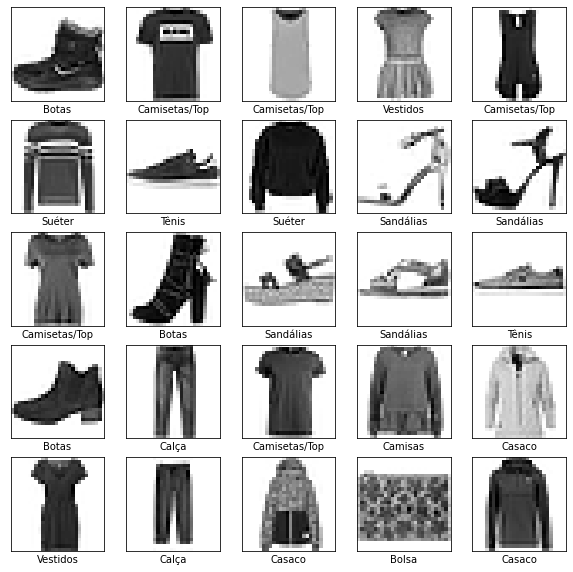

In [7]:
# Para verificar que os dados estão no formato correto e que estamos prontos para construir e treinar a rede, vamos mostrar as primeiras 25 imagens do conjunto de treinamento e mostrar o nome das classes de cada imagem abaixo.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


Montar as camadas

  O principal bloco de construção da rede neural é a camada (layer). As camadas (layers) extraem representações dos dados inseridos na rede. Com sorte, essas representações são significativas para o problema à mão.
  Muito do deep learning consiste encadear simples camadas. Muitas camadas, como tf.keras.layers.Dense,tem paramêtros que são aprendidos durante o treinamento.
  A primeira camada da rede, tf.keras.layers.Flatten, transforma o formato da imagem de um array de imagens de duas dimensões (of 28 by 28 pixels) para um array de uma dimensão (de 28 * 28 = 784 pixels. Pense nessa camada como camadas não empilhadas de pixels de uma imagem e os emfilere. Essa camada não tem paramêtros para aprender; ela só reformata os dados.
  Depois dos pixels serem achatados, a rede consiste de uma sequência de duas camadas tf.keras.layers.Dense. Essa são camadas neurais densely connected, ou fully connected. A primeira camada Dense tem 128 nós (ou neurônios). A segunda (e última) camda é uma softmax de 10 nós que retorna um array de 10 probabilidades, cuja soma resulta em 1. Cada nó contem um valor que indica a probabilidade de que aquela imagem pertence a uma das 10 classes.

In [8]:
# instanciação do modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Compile o modelo

Antes do modelo estar pronto para o treinamento, é necessário algumas configurações a mais. Essas serão adicionadas no passo de compilação:

* Função Loss —Essa mede quão precisa o modelo é durante o treinamento. Queremos minimizar a função para guiar o modelo para direção certa.
* Optimizer —Isso é como o modelo se atualiza com base no dado que ele vê e sua função loss.
* Métricas —usadas para monitorar os passos de treinamento e teste. O exemplo abaixo usa a acurácia, a fração das imagens que foram classificadas corretamente.

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# treinando o modelo em 10 iterações de aprendizado
# treinamento supervisionado ja que passamos os labels para a função fit
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4976 - accuracy: 0.8265
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3758 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3365 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3136 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2962 - accuracy: 0.8900
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2828 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2668 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2563 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2470 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [11]:
# avaliando o modelo com os dados de teste segundo a acuracia
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3288 - accuracy: 0.8836

Test accuracy: 0.8835999965667725


In [12]:
# realize as predições no conjunto de teste
predictions = model.predict(test_images)

In [13]:
# veja as respostas do modelo
# A predição é um array de 10 números. Eles representam um a confiança do modelo que a imagem corresponde a cada um dos diferentes artigos de roupa. Podemos ver cada label tem um maior valor de confiança:
print('A classe verdadeira é:', class_names[test_labels[0]])
print('A classe predita é:', class_names[np.argmax(predictions[0])])

A classe verdadeira é: Botas
A classe predita é: Botas


Modelos tf.keras são otimizados para fazer predições em um batch, ou coleções, de exemplos de uma vez. De acordo, mesmo que usemos uma única imagem, precisamos adicionar em uma lista:

In [17]:
# Adiciona a imagem em um batch que possui um só membro.
img = test_images[500]
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [22]:
np.argmax(predictions_single[0])

2

In [23]:
# realiza a predição da unica imagem
predictions_single = model.predict(img)
print('Predicao da imagem unica:', class_names[np.argmax(predictions_single[0])])

Predicao da imagem unica: Suéter
